# I. Perkenalan


**Identity**

Wirawan Setio Aji <br>
BATCH-14 

**Dataset**

Dataset Ini Merupakan data customer pada pelayanan peminjaman uang (Debitur).<br>
data diambil dari Hacktive8 BigQuery private server 


- **CUST_ID**: customer id
- **BALANCE**: Rata-rata balance setiap bulan Monthly average balance (based on daily balance averages) .
- **BALANCE_FREQUENCY**: Rasio 12 bulan dengan balance.
- **PURCHASES**: Total pengeluaran pada 12 bulan terakhir.
- **ONEOFF_PURCHASES**: total banyak pengeluaran pembelian dalam sekali belanja
- **INSTALLMENTS_PURCHASES**: Pembelian Asset
- **CASH_ADVANCE**: Total penarikan uang tunai pada kartu kredit
- **PURCHASES** FREQUENCY: Frekuensi Pembelian setidaknya satu dalam 1 bulan
- **ONEOFF_PURCHASES_FREQUENCY**: frekuensi melakukan belanja
- **PURCHASES_INSTALLMENTS_FREQUENCY**: frekuensi pembelian cicilan
- **ADVANCE_FREQUENCY**: Cash-Advance frequency 
- **AVERAGE_PURCHASE_TRX**: rata-rata transfer pembelian 
- **CASH_ADVANCE_TRX**: nilai transaksi tunai  
- **PURCHASES_TRX**: angka transaksi
- **CREDIT_LIMIT**: limit pada pinjaman
- **MINIMUM_PAYMENTS**: Total minimum pembayaran pinjaman
- **PRC_FULL_PAYMEN**: Persentase pelunasan yang dibayar tuntas tiap bulan.
- **TENURE**: jangka waktu pinjaman

menggunakan query :

```SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_014.credit-card-information` where mod(CUST_ID, 2) = 0```



**Objective**<br>
membuat *Clustering* / segmentasi customer terhadap data nasabah yang melakukan pinjaman pada suatu bank. 

**Pertanyaan Konseptual**
1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !


# II. Import Libraries

Seluruh *Library* untuk menunjang pengerjaan proyek 

In [2]:
import pandas as pd # Data flow
pd.set_option("display.max.columns",None) # display all columns
import numpy as np # algebra linear
%load_ext autoreload

%autoreload 2
# Data Visual
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


#Preprocessing
from sklearn.model_selection import train_test_split# split train test and train set
from sklearn.preprocessing import MinMaxScaler # feature scalling MinMaxScaler
from sklearn.decomposition import PCA # for feature reduction
# Math Modelling
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN # K Means clustering algorithm 
from sklearn.mixture import GaussianMixture # Gaussian Mixture clustering
# dimensional reduction 

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Evaluation Model 
from sklearn.metrics import silhouette_score
 # outliers sencoring
from outliermod import skewness,outliersCheck,outlier_graph,censoring_outliers

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold


# III. Data Loading
Sebelum Melakukan **Data Explore**, muat data pada dataframe dan **mempelajari** secara umum tentang **tipe data**, **konteks setiap kolom** pada data yang diperoleh

In [3]:
# load Uber and lyft data into 'data' 
df_credit = pd.read_csv('./h8dsft_P1G4_wirawan_setio_aji.csv') # ,na_values=[' ?','?']
df_credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


## Dataframe Info

melihat dimensi pada dataframe dan kelengkapan nilai data

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

dataframe memiliki 4475 baris dan 18 kolom

terdapat > 100 missing value pada kolom `minimum_payments` dan 1 nilai pada `credit_limit`

## Melihat lebih dalam tentang data Numerik dan Kategori

untuk mencari mana data yang sesungguhnya memiliki sifat **kategori** dengan melihat **rasio** antara jumlah ***unique value*** dan jumlah **barisnya**

In [5]:
length = len(df_credit)
list_col = list(df_credit.columns)
list_disc = []
def unique_ratio(df,col,length):
    return len(df[col].unique()) / length

for col in list_col:
    rate = unique_ratio(df_credit,col,length)
    if rate < 0.01:
        list_disc.append(col)
    print("unique ratio " + col +" :",rate)
    

unique ratio CUST_ID : 1.0
unique ratio BALANCE : 0.9919553072625699
unique ratio BALANCE_FREQUENCY : 0.009385474860335195
unique ratio PURCHASES : 0.7191061452513966
unique ratio ONEOFF_PURCHASES : 0.46324022346368715
unique ratio INSTALLMENTS_PURCHASES : 0.5267039106145252
unique ratio CASH_ADVANCE : 0.48156424581005586
unique ratio PURCHASES_FREQUENCY : 0.010502793296089385
unique ratio ONEOFF_PURCHASES_FREQUENCY : 0.009832402234636871
unique ratio PURCHASES_INSTALLMENTS_FREQUENCY : 0.010502793296089385
unique ratio CASH_ADVANCE_FREQUENCY : 0.010279329608938547
unique ratio CASH_ADVANCE_TRX : 0.012290502793296089
unique ratio PURCHASES_TRX : 0.03284916201117318
unique ratio CREDIT_LIMIT : 0.03441340782122905
unique ratio PAYMENTS : 0.9720670391061452
unique ratio MINIMUM_PAYMENTS : 0.9649162011173185
unique ratio PRC_FULL_PAYMENT : 0.010502793296089385
unique ratio TENURE : 0.0015642458100558658


In [6]:
list_disc

['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'TENURE']

Setelah melihat masing-masing rasio ***Unique Value*** pada setiap kolom, terdapat beberapa 
data numerik yang **tergolong kategori** yaitu pada kolom :

`'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'TENURE'`

In [7]:
print(list_disc)
for col in list_disc:
    print(df_credit[col].unique())

['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'TENURE']
[0.125    0.875    1.       0.375    0.545455 0.454545 0.363636 0.181818
 0.909091 0.       0.272727 0.090909 0.727273 0.818182 0.25     0.636364
 0.75     0.625    0.6      0.5      0.833333 0.444444 0.666667 0.8
 0.571429 0.857143 0.777778 0.7      0.333333 0.888889 0.166667 0.714286
 0.2      0.3      0.1      0.9      0.4      0.111111 0.222222 0.285714
 0.142857 0.555556]
[0.       0.125    0.25     0.083333 0.166667 0.375    0.1      0.333333
 0.5      0.416667 0.625    0.666667 0.75     0.583333 0.875    1.
 0.7      0.833333 0.142857 0.888889 0.916667 0.285714 0.909091 0.571429
 0.818182 0.454545 0.090909 0.363636 0.181818 0.636364 0.727273 0.555556
 0.3      0.6      0.272727 0.714286 0.444444 0.2      0.4      0.428571
 0.111111 0.222222 0.545455 0.857143]
[ 8 12 10  6  7 11  9]


`BALANCE_FREQUENCY` dan `ONEOFF_PURCHASES_FREQUENCY` dapat dibilang terlalu kecil jumlah dari **unique value** untuk datap membuat **Clustering** berjalan lebih baik nantinya, nantinya akan tumpang tindih jika dilakukan ***PCA***

## Ganti Nama Kolom

dikarenakan nama kolom menggunakan uppercase yang nantinya akan mempersulit pengetikan

In [8]:
# gunakan perulangan untuk merename kolom menjadi lowercase
cols = list(map(lambda x : x.lower(),df_credit.columns))
# rename kolom
df_credit.columns = cols
df_credit

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


# IV. Exploratory Data Analysis

**EDA** Menganalisa untuk mendapatkan insight pada data yang diperoleh

## Perbandingan Antar Tenure

dilkakukan filtering data pada nilai `TENURE` dan lakukan plot secara umum

<AxesSubplot:xlabel='count', ylabel='tenure'>

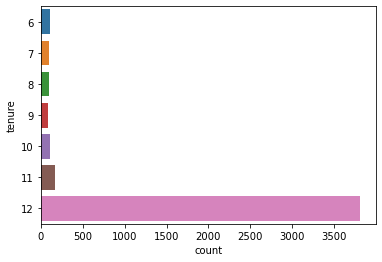

In [9]:
sns.countplot(data=df_credit,y='tenure')

dapat dilihat **debitur** atau nasabah yang melakukan **pinjaman**, sangat suka dengan pinjaman **jangka waktu 1 tahun** atau 12 bulan

### Rata-rata Pinjaman Dari Setiap Macam Pinjaman

Dalam Pinjaman ini terbagi menjadi 2 Pelayanan, yaitu Pinjaman **Tunai**, dan Pinjaman untuk **Pembelian**, dan pada pelayanan pinjaman pembelian terdapat dua macam pembelian yaitu pembelian **asset** dan **produk**

membuat **plot** dengan **perbandingan** rata-rata dari 3 macam pinjaman yaitu `cash_advance`(Tunai),`purchases`(Pembelian),`installments_purchases` (Pembelian Asset),`oneoff_purchases`(Pembelian Produk)

Text(0.5, 1.0, 'Tenure pada Pembelian Produk')

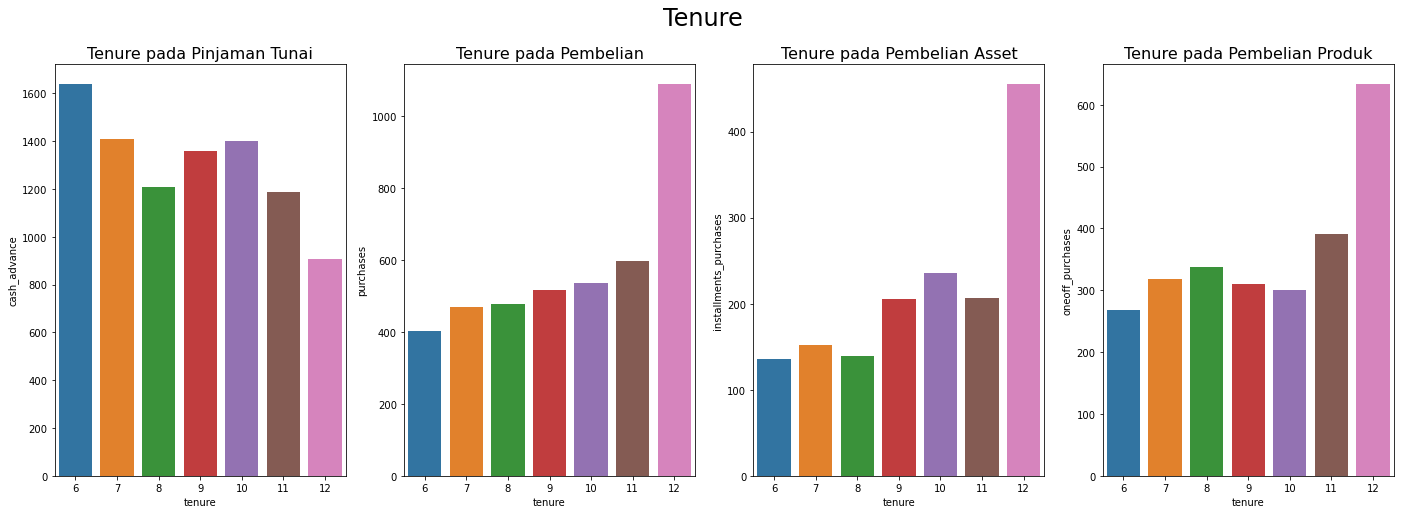

In [10]:
# data group pada tenure
group_tenure = df_credit.groupby('tenure')[['cash_advance','purchases','installments_purchases','oneoff_purchases']].mean()

fig,ax = plt.subplots(ncols=4,figsize=(24,8))
fig.suptitle("Tenure",fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot(x=group_tenure.index,y=group_tenure['cash_advance'],ax=ax[0])
ax[0].set_title('Tenure pada Pinjaman Tunai',fontsize= 16)

sns.barplot(x=group_tenure.index,y=group_tenure['purchases'],ax=ax[1])
ax[1].set_title('Tenure pada Pembelian',fontsize= 16)

sns.barplot(x=group_tenure.index,y=group_tenure['installments_purchases'],ax=ax[2])
ax[2].set_title('Tenure pada Pembelian Asset',fontsize= 16)

sns.barplot(x=group_tenure.index,y=group_tenure['oneoff_purchases'],ax=ax[3])
ax[3].set_title('Tenure pada Pembelian Produk',fontsize= 16)


pada Pinjaman jangka panjang atau **pinjaman setahun** menjadi paling sering melakukan **belanja** dan **belanja asset**.

Beda cerita pada pinjaman **uang tunai** atau `cash_advance` lebih sering dilakukan pada pinjaman jangka **6 bulan** 

### Melihat Hubungan Tenure dan Pola Pelunasan

membuat **plot** dengan **perbandingan** dari 3 dpola pelunasan dari para debitur, pada kolom `minimum_payments`, `payments`, `prc_full_payment`

Text(0.5, 1.0, 'Tenure pada prc_full_payment')

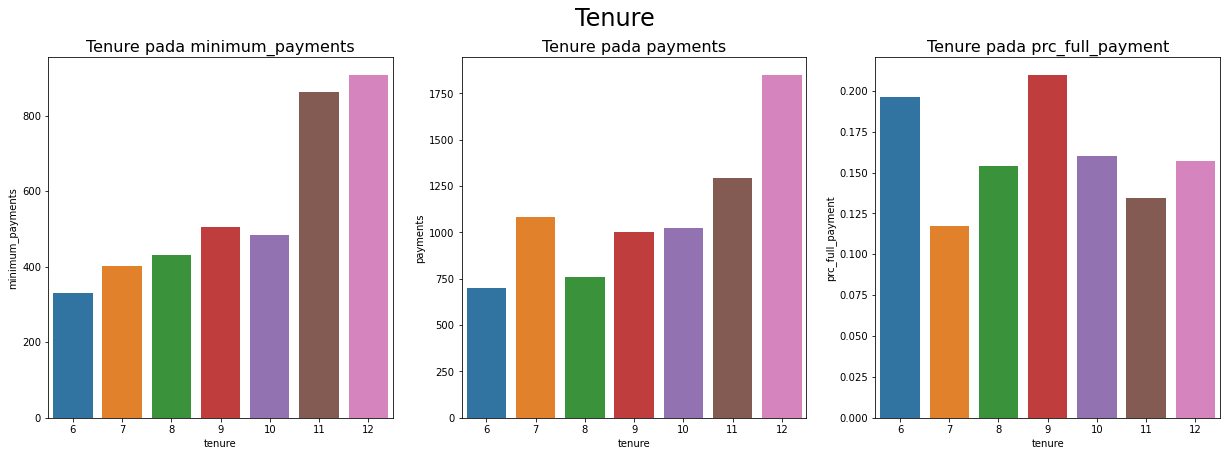

In [11]:
# data group pada tenure dan aggregasi rata-rata
group_tenure = df_credit.groupby('tenure')[['minimum_payments','payments','prc_full_payment']].mean()

fig,ax = plt.subplots(ncols=3,figsize=(21,7))
fig.suptitle("Tenure",fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot(x=group_tenure.index,y=group_tenure['minimum_payments'],ax=ax[0])
ax[0].set_title('Tenure pada minimum_payments',fontsize= 16)

sns.barplot(x=group_tenure.index,y=group_tenure['payments'],ax=ax[1])
ax[1].set_title('Tenure pada payments',fontsize= 16)

sns.barplot(x=group_tenure.index,y=group_tenure['prc_full_payment'],ax=ax[2])
ax[2].set_title('Tenure pada prc_full_payment',fontsize= 16)

jika dilihat dari **batasan pelunasannya**, batasan cicilan minimal tiap bulannya **tertinggi ada pada pinjaman 1 tahun dan 11 bulan** dan pada jumlah pelunasannya rata-rata terbanyak adalah pinjaman 12 bulan.

namun pada pelunasan yang berhasil diselesaikan tiap bulannya **lebih sering dilakukan** pada pinjaman jangka waktu **9 bulan** dan **disusul** oleh **6 bulan**


## Hubungan Credit Limit, Balance dan prc_full_payment

coba bandingkan **batasan pinjaman** dan **balance** debitur, dengan seberapa **rajin membayar lunas** tiap bulannya

<AxesSubplot:xlabel='balance', ylabel='credit_limit'>

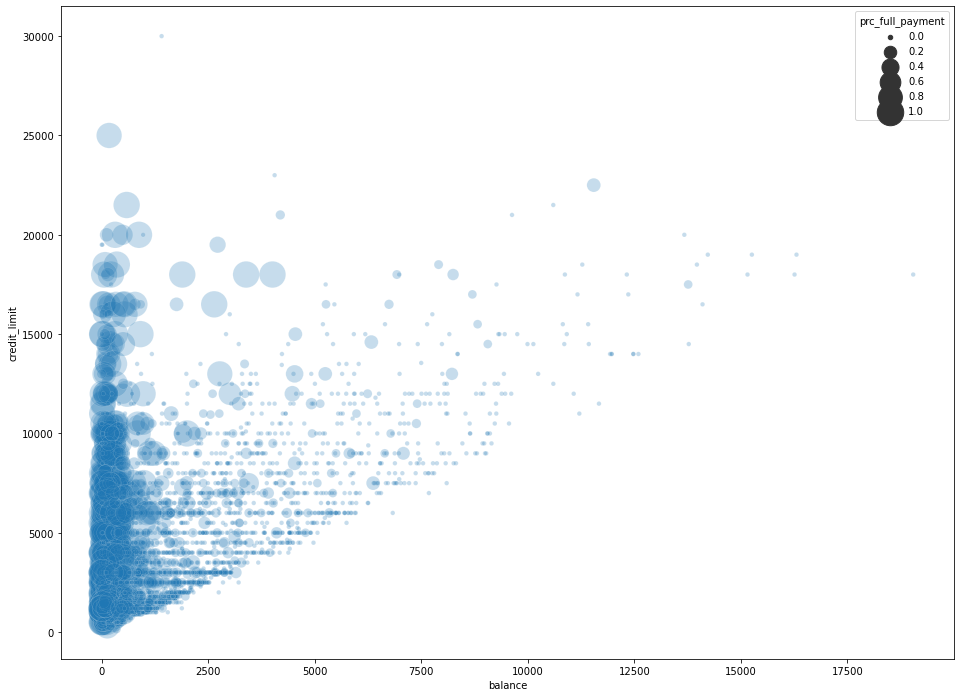

In [12]:
rcParams['figure.figsize'] = 16,12
sns.scatterplot(data=df_credit,y='credit_limit',x='balance',size='prc_full_payment',sizes=(20,700),alpha=0.25)

dapat dilihat **semakin kecil** balance dan **semakin besar** batasan pinjaman, debitur **semakin rajin** membayar lunas pinjaman tiap bulannya

# V. Data Preprocessing

- pilih **inference data**
- pilih **non inference** data untuk dijadikan data training dan test


## Inference & Non-Inference

**Set Data Inference**

In [13]:
# take 12 sample of random data
pickup_inf = df_credit.sample(12,random_state=12)

pickup_inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2987 to 2274
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           12 non-null     int64  
 1   balance                           12 non-null     float64
 2   balance_frequency                 12 non-null     float64
 3   purchases                         12 non-null     float64
 4   oneoff_purchases                  12 non-null     float64
 5   installments_purchases            12 non-null     float64
 6   cash_advance                      12 non-null     float64
 7   purchases_frequency               12 non-null     float64
 8   oneoff_purchases_frequency        12 non-null     float64
 9   purchases_installments_frequency  12 non-null     float64
 10  cash_advance_frequency            12 non-null     float64
 11  cash_advance_trx                  12 non-null     int64  
 12  purch

**Set Non-Inference**

In [14]:
# REMOVE INFERENCE SET FROM DATA SET for non inference data
non_inference = df_credit.drop(pickup_inf.index)
non_inference.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4463 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           4463 non-null   int64  
 1   balance                           4463 non-null   float64
 2   balance_frequency                 4463 non-null   float64
 3   purchases                         4463 non-null   float64
 4   oneoff_purchases                  4463 non-null   float64
 5   installments_purchases            4463 non-null   float64
 6   cash_advance                      4463 non-null   float64
 7   purchases_frequency               4463 non-null   float64
 8   oneoff_purchases_frequency        4463 non-null   float64
 9   purchases_installments_frequency  4463 non-null   float64
 10  cash_advance_frequency            4463 non-null   float64
 11  cash_advance_trx                  4463 non-null   int64  
 12  purcha

In [15]:
# reset index for safety measure
non_inference.reset_index(drop=True,inplace=True)


## Feature Selection

Dari prosess **EDA** dapat ditentukan **feature** apasaja yang akan digunakan .

drop beberapa fitur,
- `cust_id` Karenakan id debitur tidak berarti apapun dalam *clustering*

-  `BALANCE_FREQUENCY` dikarenakan rasio jumlah data dan nilai unik terlalu kecil

-  `ONEOFF_PURCHASES_FREQUENCY` dikarenakan rasio jumlah data dan nilai unik juga terlalu kecil

- `TENURE` Terlihat bahwa ini adalah data kategori, dan data kategori tidak baik untuk clustering

In [16]:
drop_list =['cust_id','balance_frequency', 'oneoff_purchases_frequency', 'tenure'] 
features = df_credit.drop(drop_list,axis=1)

## Missing Value
**Check** jika feature memiliki **Missing Value**

Check missing value pada **Features**

In [17]:
features.isnull().sum()

balance                               0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    158
prc_full_payment                      0
dtype: int64

dikarenakan jumlah missing data yang **sedikit** maka akan **dihilangkan baris** yang memiliki missing value

In [18]:
features = features.dropna()

**check** kembali features

In [19]:
features.isna().sum()

balance                             0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
dtype: int64

feature yang telah dipilih **tidak terdapat** missing value

## Bagi Antara Numerik and Kategori

dikarenakan**tidak ada data ketegori** yang dipilih maka lewati langkah pembagian data ini

## Outliers
Dikarenakan objective kali ini menggunakan Windsorizer

### Distribusi Feature

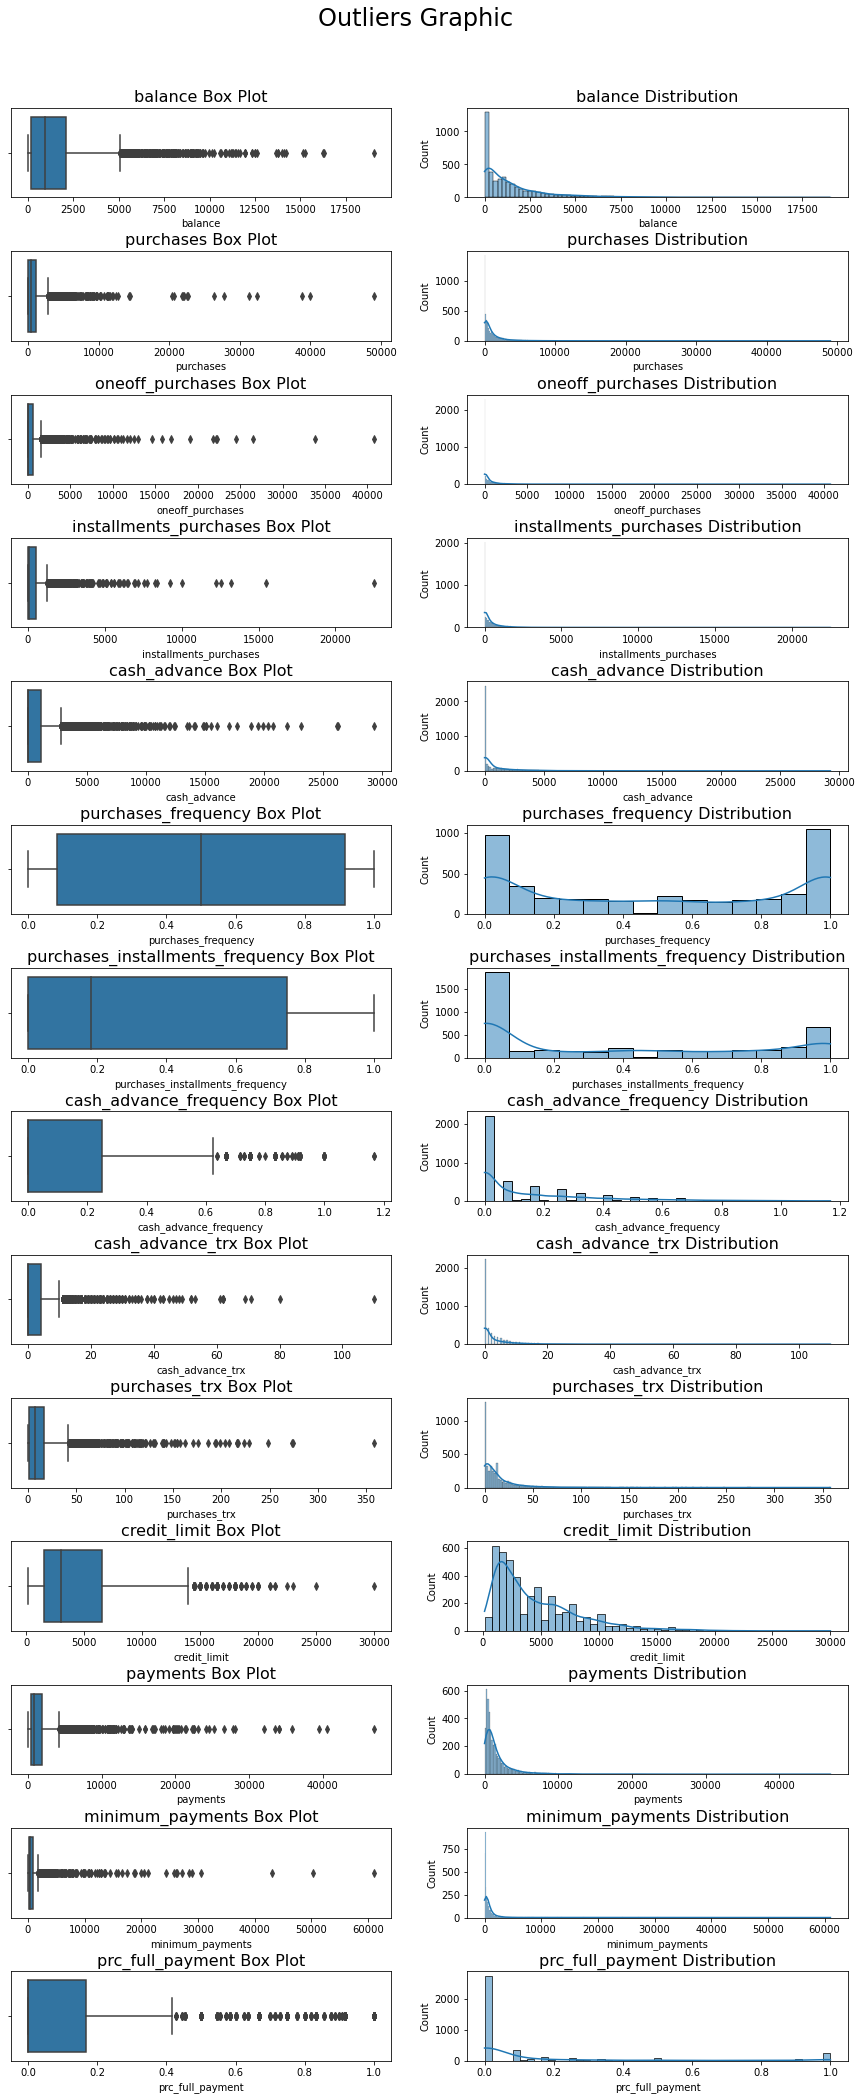

In [20]:
outlier_graph(features,size=(15,35))

terdapat bebrapa banyak sekali feature yang memiliki distribusi skew extreme

### Jumlah outlier

In [21]:
col_skews = skewness(features)

In [22]:
outliers = outliersCheck(features,col_skews)


feature name :  purchases_frequency
outliers percentage : 0.0%
distribution normal
upper : 1.2948029305914153 lower : -0.3034524333717646
****************************************************
feature name :  purchases_installments_frequency
outliers percentage : 0.0%
distribution normal
upper : 1.166239089952888 lower : -0.4266286979232325
****************************************************
feature name :  balance
outliers percentage : 0.4%
distribution right_skew_ext
upper : 11807.81711225 lower : -5865.572021
****************************************************
feature name :  purchases
outliers percentage : 1.6%
distribution right_skew_ext
upper : 7262.97 lower : -3315.8325000000004
****************************************************
feature name :  oneoff_purchases
outliers percentage : 1.9%
distribution right_skew_ext
upper : 4477.22 lower : -1800.0
****************************************************
feature name :  installments_purchases
outliers percentage : 1.3%
distribution 

meskipun pada plot box terlihat banyak outlier, tetapi dalam bentuk persentase, jumlahnya tidak terlalu banyak

### Censoring Nilai Outlier 

**Censor** atau **Capping** dilakukan dengan menggunakan library `Winsorizer`

In [23]:
# outliers use quantile 0.05 and 0.95 to handle the serum_creatinine
features_clean = censoring_outliers(features,outliers,0.05)

jika check kembali, outlier sudah hilang

In [24]:
col_skews = skewness(features_clean)
outliers = outliersCheck(features_clean,col_skews)

feature name :  purchases_frequency
outliers percentage : 0.0%
distribution normal
upper : 1.2948029305914153 lower : -0.3034524333717646
****************************************************
feature name :  purchases_installments_frequency
outliers percentage : 0.0%
distribution normal
upper : 1.166239089952888 lower : -0.4266286979232325
****************************************************
feature name :  credit_limit
outliers percentage : 0.0%
distribution right_skew
upper : 14000.0 lower : -6000.0
****************************************************
feature name :  balance
outliers percentage : 0.0%
distribution right_skew_ext
upper : 11806.114580375 lower : -5865.572021
****************************************************
feature name :  purchases
outliers percentage : 0.0%
distribution right_skew_ext
upper : 7260.594375000001 lower : -3315.8325000000004
****************************************************
feature name :  oneoff_purchases
outliers percentage : 0.0%
distribution rig

outlier sudah tidak ada lagi

In [25]:
print(features.describe().T)
print(features_clean.describe().T)

                                   count         mean          std  \
balance                           4316.0  1600.114511  2107.347942   
purchases                         4316.0  1025.274057  2241.729131   
oneoff_purchases                  4316.0   600.770438  1690.105736   
installments_purchases            4316.0   424.888909   940.627467   
cash_advance                      4316.0   986.980658  2159.134558   
purchases_frequency               4316.0     0.495675     0.399564   
purchases_installments_frequency  4316.0     0.369805     0.398217   
cash_advance_frequency            4316.0     0.136236     0.200511   
cash_advance_trx                  4316.0     3.252549     6.576772   
purchases_trx                     4316.0    14.801900    24.473182   
credit_limit                      4316.0  4524.431479  3688.856008   
payments                          4316.0  1785.801612  2997.093142   
minimum_payments                  4316.0   854.624165  2306.642962   
prc_full_payment    

Nilai Maksimal pada setiap kolom berubah dan rata-rata nilai sedikit berubah

In [26]:
features = features_clean

## Feature Scalling
Feature Scalling untuk seluruh data dengan menggunakan MinMaxScaller

In [27]:
scale = MinMaxScaler()
scale.fit(features)

features_scaled = scale.transform(features)

features_scaled

array([[0.15914436, 0.02609486, 0.03847274, ..., 0.03462195, 0.15178114,
        0.        ],
       [0.07782886, 0.14820867, 0.21851025, ..., 0.04164682, 0.05608258,
        0.        ],
       [0.1776987 , 0.36735482, 0.54160659, ..., 0.06452013, 0.08398238,
        0.        ],
       ...,
       [0.57116367, 0.14212325, 0.15957598, ..., 0.17010636, 0.3276427 ,
        0.        ],
       [0.81640372, 0.40432592, 0.59611463, ..., 0.14820397, 0.87895824,
        0.090909  ],
       [0.33344092, 0.26146543, 0.08475209, ..., 0.50194796, 0.33676083,
        0.090909  ]])

## Feature Dimensional Reduction
*feature dimensional reduction* dilakukan dengan `PCA`. mengapa dilakukan `PCA` padahal feature sudah relatif kecil ?


### Nilai VIF

Melihat **nilai VIF** pada setiap **kolom features** untuk menilai apakah kolom tersebut memiliki ***multicollinearity*** yang tinggi dengan melihat **nilai VIF** tersebut

In [28]:
backup_scaled = features_scaled.copy()
# calculating VIF for each feature
vif_vals = [variance_inflation_factor(features_scaled, i) for i in range(features_scaled.shape[1])]
idx = [i for i in range(len(vif_vals))]
vif_data = pd.DataFrame({'idx':idx,'vif_value':vif_vals}, index=features.columns)

print(features_scaled.shape)
vif_data


(4316, 14)


,idx,vif_value
balance,0,8.119291
purchases,1,41.907382
oneoff_purchases,2,19.842851
installments_purchases,3,13.570487
cash_advance,4,4.437991
purchases_frequency,5,13.252279
purchases_installments_frequency,6,12.447803
cash_advance_frequency,7,8.174317
cash_advance_trx,8,9.444272
purchases_trx,9,7.196691



jika VIF <= 5 ada 5 kolom maka saya berasumsi bahwa ada **diantara 6**, nantinya akan dibuktikan dengan EVR

###  Nilai EVR

mencari nilai EVR pada PCA, untuk melihat seberapa banyak kolom yang akan direduksi 

In [29]:
pca = PCA()
pca.fit(features_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [30]:
pca.explained_variance_ratio_

array([0.4022814 , 0.22665054, 0.10064778, 0.07530402, 0.05142754,
       0.03614153, 0.03293645, 0.02444249, 0.01422228, 0.01196871,
       0.01048115, 0.0088944 , 0.00320213, 0.00139959])

setelah dilakukan PCA, coba tampilkan grafik untuk posisi **elbow**

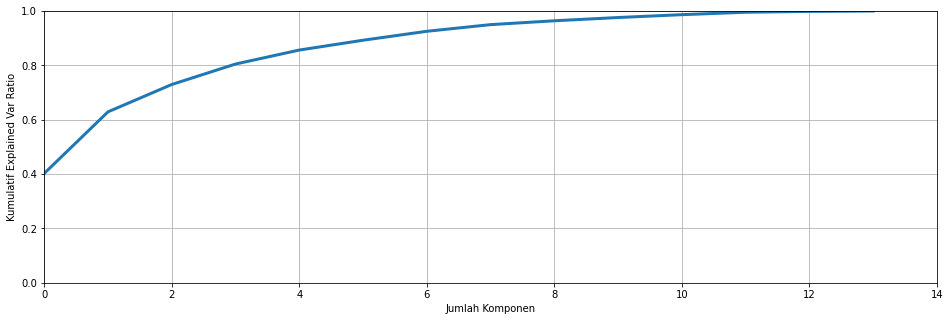

In [31]:
fig,ax=plt.subplots(figsize=(16,5))
# ax[0].plot(range(1,len(cumsum)+1),pca.explained_variance_ratio_)
# ax[0].set_xlabel('Komponen')
# ax[0].set_ylabel('Explained Variance Ratio')

ax.plot(cumsum,linewidth=3)
ax.set_xlabel('Jumlah Komponen')
ax.set_ylabel('Kumulatif Explained Var Ratio')
# ax[1].plot(cumsum, linewidth=3)
ax.axis([0, 14, 0, 1])
# # ax[1].ylabel("Explained Variance Ratio")
# ax[1].plot([d, d], [0, 0.95], "k:")
# ax[1].plot([0, d], [0.95, 0.95], "k:")
# ax[1].plot(d, 0.95, "ko")
ax.grid(True)


Bisa diingat bahwa asumsi evaluasi VIF adalah reduksi komponen paling optimal ada disekitar  **6 kolom**

dan dapat dibuktikan bahwa **kenaikan nilai EVR tidak signifikan** dimulai dari **komponen 6, dan pada EVR 0.9 pada komponen 9**

Text(0.5, 1.0, 'Scaled Data')

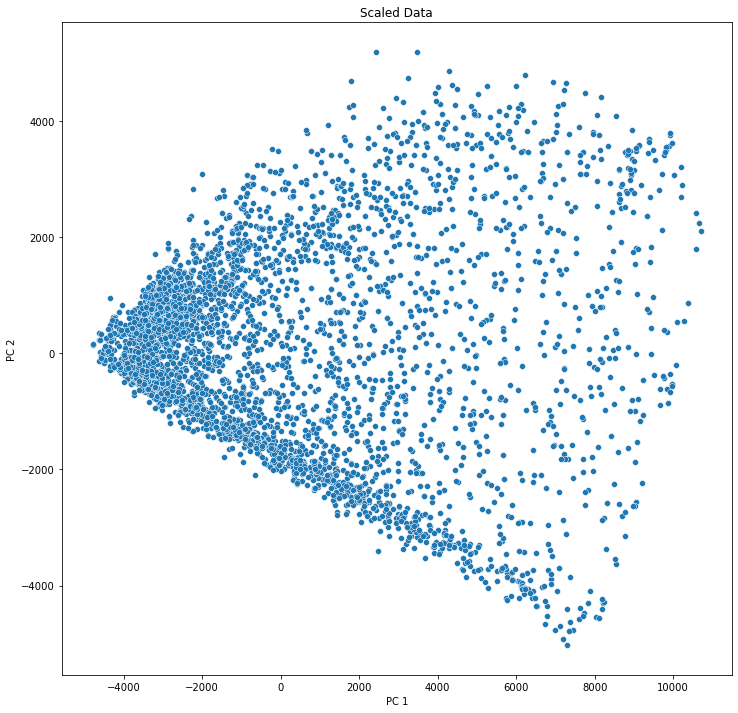

In [32]:

pca2d=PCA(n_components=2).fit(features)
pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Scaled Data')

persebaran Tabel PCA membentuk **pola berbentuk Corong**, kemungkinan besar untuk **tidak menggunakan** **DBSCAN**,karenakan ada beberapa data point yang sangat berdekatan tapi semakin jauh semakin berjauhan  untuk algorithm pembanding selain **K Means** karena dipastikan akan membuat 1 klaster saja

In [33]:
pca = PCA(n_components=6)
pca.fit(features)
features_reduced = pca.transform(features)

feature di reduksi hingga **7 komponen**, sesuai dengan **hasil evaluasi dari nilai VIF dan EVR**

# VI. Model Definition

model untuk membuat clustering, menggunakan pendekatan *machine learning* ***unsupervised*** dengan **2 algoritma** yang **Clustering** yang berbeda

In [34]:
"""
Fungsi untuk menampilkan visualisasi
untuk mempermudah evaluasi 
"""

def innertiaPlot(k_range,random=42,inertias=0):
    plt.figure(figsize=(8, 3.5))
    plt.plot(range(1, k_range + 1), inertias, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Inertia", fontsize=14)
    # plt.annotate('Elbow',
    #             xy=(4, inertias[3]),
    #             xytext=(0.55, 0.55),
    #             textcoords='figure fraction',
    #             fontsize=16,
    #             arrowprops=dict(facecolor='black', shrink=0.1)
    #             )
    plt.axis([1, k_range,  inertias[len(inertias)-1],inertias[0]])
    plt.show()
    

def silhouettePlot(kmeans_per_k,silhouette_scores,max_k,size=(11, 28),cols = 2) :   
    plt.figure(figsize=size)

    for k in range(2, max_k+1):
        plt.subplot(max_k+1, cols, k - 1)
        
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(features_reduced, y_pred)

        padding = len(features_reduced) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.gnuplot(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")
        
        if k in range(2, max_k+1):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)
    plt.show()

def silhouetteLine(silhouette_scores,k_range):
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, k_range), silhouette_scores, "bo-")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Silhouette score", fontsize=14)
    plt.axis([1, k_range, 0.1,silhouette_scores[0]])
    plt.show()
    
def bic_aic(bics,aics):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(bics)+1), bics, "bo-", label="BIC")
    plt.plot(range(1, len(aics)+1), aics, "go--", label="AIC")
    plt.xlabel("$k$", fontsize=14)
    plt.ylabel("Information Criterion", fontsize=14)
    plt.axis([1, len(bics)+1, np.min(aics) - 50, np.max(aics) + 50])
    # plt.annotate('Minimum',
    #             xy=(3, bics[2]),
    #             xytext=(0.35, 0.6),
    #             textcoords='figure fraction',
    #             fontsize=14,
    #             arrowprops=dict(facecolor='black', shrink=0.1)
    #             )
    plt.legend()
    plt.show()



## K Means

sebelum memastikan model dengan parameter yang tepat, pertama harus memilih **nilai K** yang optimal. untuk memilih K yang tepat dilakukan **2 Method** dan **dibandingkan** yaitu **Elbow Method** dan **Sillouette Score**

### Method Elbow Terhadap Inertia

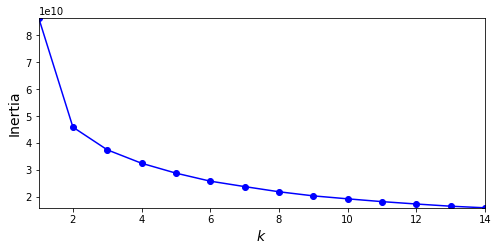

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features_reduced)
            for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Evaluasi Nilai
silhouette_scores = [silhouette_score(features_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

innertiaPlot(k_range=14,inertias=inertias)


jika dilihat dari nilai **inertia**, **nilai K** yang **paling optimal** diantara 3 hingga 4. akan tetapi ada keraguan untuk milih **nilai K** 4 atau 6 maka dilihat juga pada ***Silhouette Coefficient***.

### Silhouette Scores

untuk melihat ***Silhouette Score*** digunakan **visualisasi **untuk dapat membandingkan antar **nilai k**

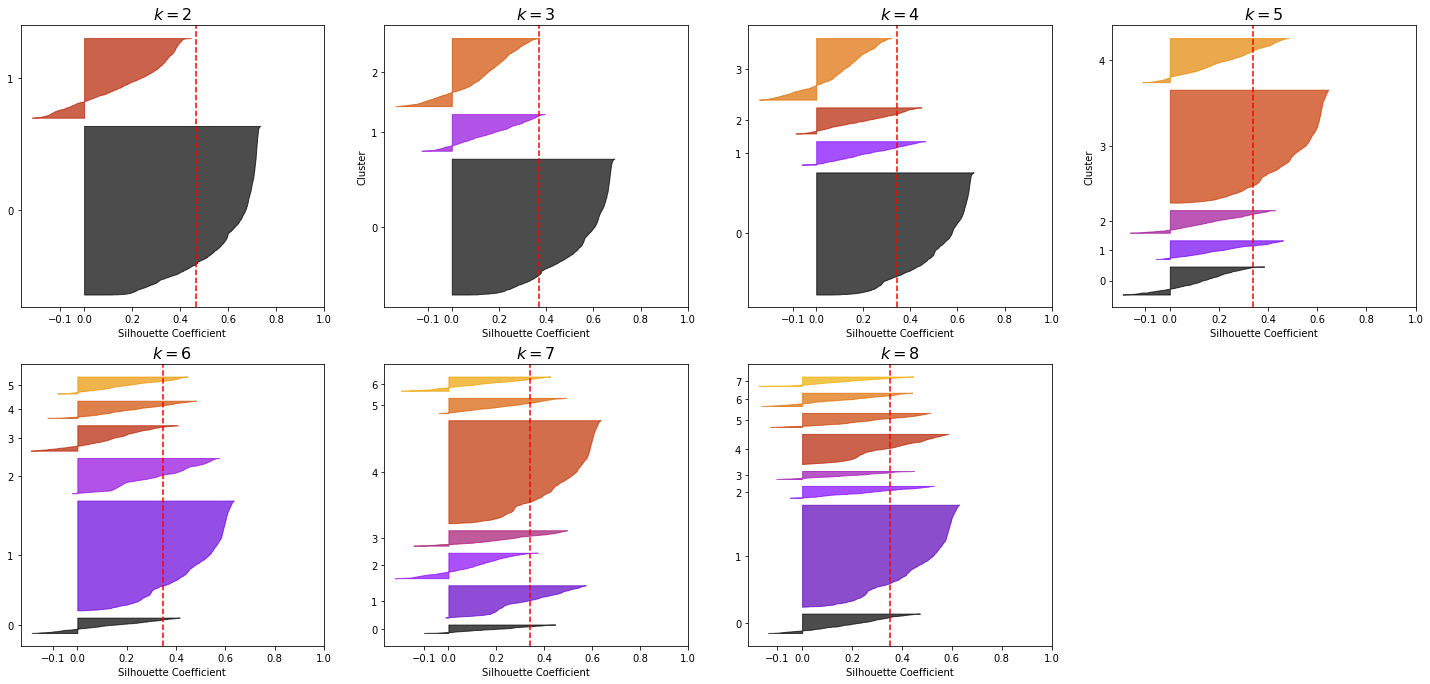

In [36]:
silhouettePlot(kmeans_per_k=kmeans_per_k,silhouette_scores=silhouette_scores,max_k=8,size=(25,55),cols=4)

dari hasilnya pada **segmentasi pada 2 klaster dan 4 klaster** beberapa label **tidak menyentuh daris merah atau silouette score**, sehingga tidak dapat dipilih.

Sedangkan pada segmentasi 3 klaster sudah cukup mendekati **garis merah** tetapi tidak terlalu konsisten, meski pun begitu harus ditinjau juga nilai **silhouette score** dengan **line chart**

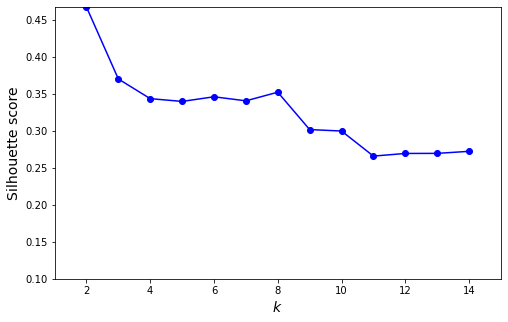

In [37]:

silhouetteLine(silhouette_scores=silhouette_scores,k_range=len(silhouette_scores)+2)

namun pada silhouette scores terhadap banyak klaster menggunakan **line Chart** . dapat dikonfirmasi bahwa **2 klaster** yang paling tinggi, namun salah satu koefisien label **tidak menyetuh silhouette score**.

jika dilihat terbesar ke-2 adalah 3 klaster, dan segmentasi 3 klaster semua label memiliki koefisien yang sudah menyentuh nilai **menyetuh silhouette score**

terpilih K means dengan **nilai K = 3** atau `n_clusters` = 3

## Spectral Clustering

 pertama harus memilih **nilai K** atau banyak nya klaster yang optimal. untuk memilih K yang tepat dilakukan **1 Method** dan **dibandingkan**  **Sillouette Score** pada setiap nilai K

In [38]:
spectral_per_k = [SpectralClustering(n_clusters=k,n_neighbors=20,
                                     eigen_tol=0.001, affinity='nearest_neighbors',
                                     assign_labels='discretize',n_jobs=8,
                                     random_state=20)
                  .fit(features_reduced) for k in range(1, 10)]
# inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(features_reduced, model.labels_)
                     for model in spectral_per_k[1:]]
silhouette_scores
# innertiaPlot(k_range=14,inertias=inertias)
# SpectralClustering(n_clusters=k,affinity='nearest_neighbors',n_neighbors=20, n_jobs=12,n_init=115,assign_labels='kmeans',random_state=12)

[0.3561681830605749,
 0.20710249148315396,
 0.14015221300898872,
 0.0842652842535805,
 0.10258526291271743,
 0.046603846206253796,
 0.055449675567952175,
 0.07227558613807705]

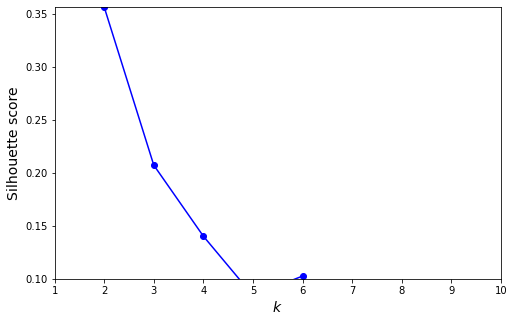

In [39]:
silhouetteLine(silhouette_scores=silhouette_scores,k_range=len(silhouette_scores)+2)

untuk silluette score jika ditinjau dengan *line chart*,segmentasi **2 klaster** memiliki silouette score tertinggi, tetapi evaluasi tidak sampai di sini

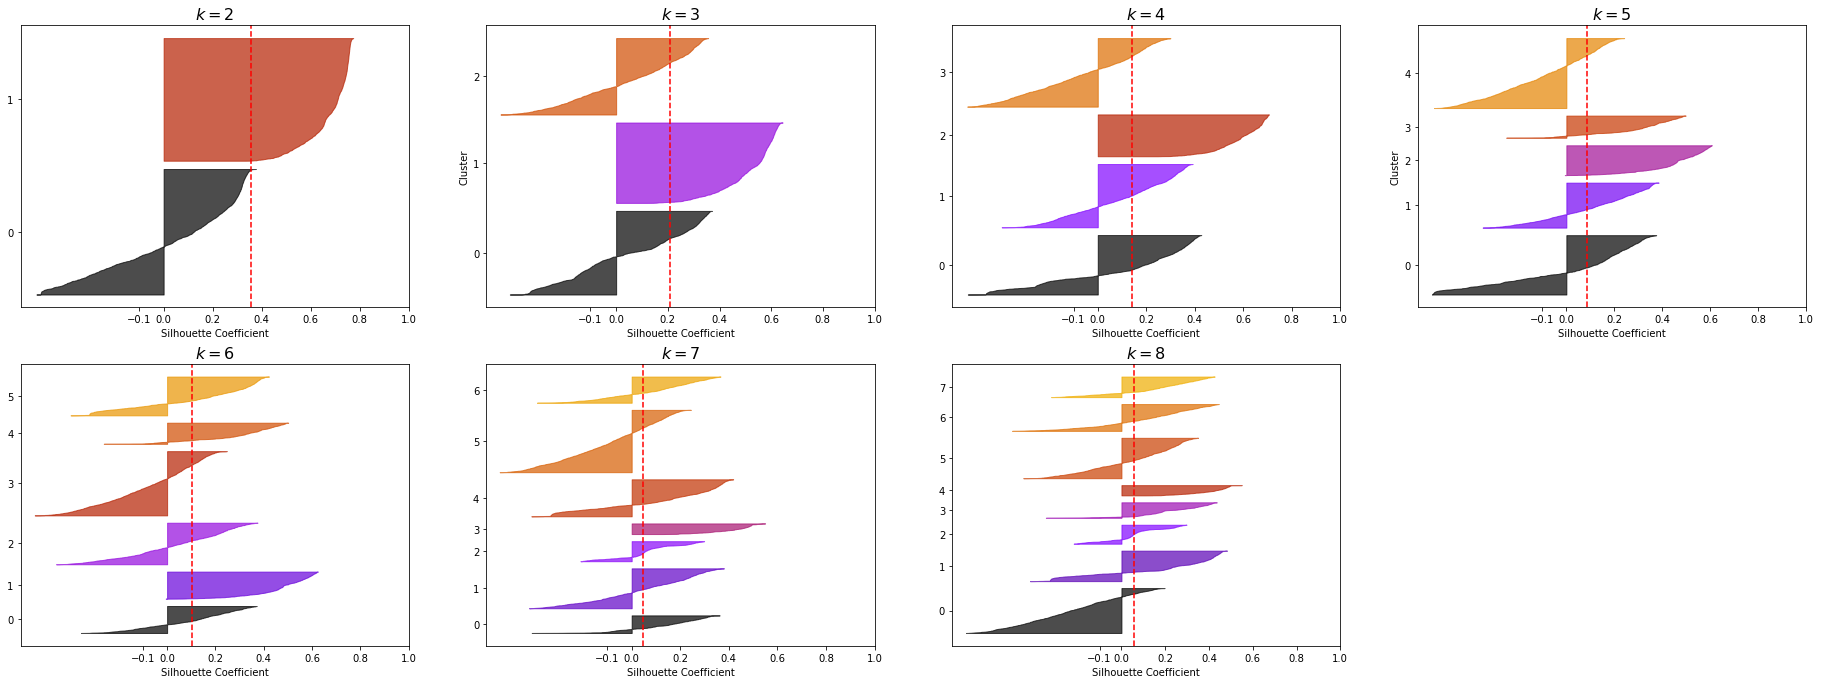

In [40]:
silhouettePlot(kmeans_per_k=spectral_per_k,silhouette_scores=silhouette_scores,max_k=8,size=(32,55),cols=4)

jika dilihat dari **konsistensi** pada silouette score **segmentasi 2 klaster** terlihat seluruh label menyentuh garis merah atau **silhouette score**.

maka dipilih jumlah **Nilai K adalah 2** atau `n_components` = 2

## Gaussian Mixture

algoritma pilihan ke-2 ialah **Gaussian Mixture**, tetapi sebelum menentukan model dengan para meter yang tepat, harus **mencari bunyak nilai klaster** yang tepat juga. **Berbeda** dari **K means** dan **Spectral Clustering** untuk menentukan banyak klaster atau **nilai K** dilakukan dengan mengevaluasi nilai **AIC dan BIC** yang paling rendah

In [41]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10,covariance_type='full', random_state=42).fit(features_reduced)
             for k in range(1, 20)]

### BIC & AIC

In [42]:
bics = [model.bic(features_reduced) for model in gms_per_k]
aics = [model.aic(features_reduced) for model in gms_per_k]

for k in range(1, len(bics)):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  2 	BIC :  422677.3456674769 	AIC :  422326.9910295261
Cluster :  3 	BIC :  395672.7117946002 	AIC :  395143.9947955108
Cluster :  4 	BIC :  392394.0147497028 	AIC :  391686.93538947485
Cluster :  5 	BIC :  379613.4340626365 	AIC :  378727.99234127
Cluster :  6 	BIC :  378499.9490715707 	AIC :  377436.1449890656
Cluster :  7 	BIC :  376514.3925472634 	AIC :  375272.2261036197
Cluster :  8 	BIC :  374399.32570032397 	AIC :  372978.79689554166
Cluster :  9 	BIC :  374993.33274709573 	AIC :  373394.44158117485
Cluster :  10 	BIC :  370096.73413536884 	AIC :  368319.4806083094
Cluster :  11 	BIC :  368733.3508454577 	AIC :  366777.7349572596
Cluster :  12 	BIC :  368855.1227810602 	AIC :  366721.1445317236
Cluster :  13 	BIC :  372635.5197964329 	AIC :  370323.1791859577
Cluster :  14 	BIC :  365035.8624032593 	AIC :  362545.15943164553
Cluster :  15 	BIC :  367444.1769635429 	AIC :  364775.11163079046
Cluster :  16 	BIC :  364006.61852269794 	AIC :  361159.19082880695
Cluster : 

karena angka terlalu besar maka tampilan text **kurang begitu baik untuk mengevaluasi nilai BIC dan AIC**

untuk melihat **visualisasi** nilai **BIC dan AIC** akan dibuat *line chart*  

**Visualisasi BIC dan AIC**

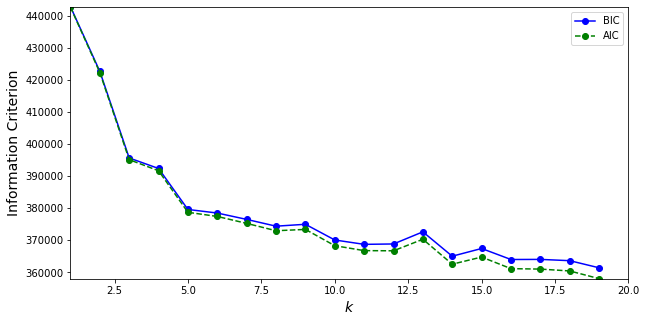

In [43]:
bic_aic(bics=bics,aics=aics)

terlihat AIC terendah ada pada **10 klaster** namun pada **6 klaster** terdapat jarak AIC dan BIC yang tak terlalu jauh

setelah beberapa kali percobaan dipilihlah segmentasi **3 klaster** untuk mendapatkan hasil yang maksimal

## DBSCAN

evaluasi pemilihan **hyperparameter** **sangat berbeda pada DBSCAN dari yang lain**, karena DBSCAN akan mencari banyak segmentasi klaster, akan tetapi **nilai epsilon dan minimum sample sangat sensitif untuk menentukan banyak segmentasi**

Sangat **tidak direkomendasi** menggunakan **DBSCAN** untuk **persebaran PCA 2D** yang terdapat pada kasus ini

In [44]:

dbs_per_eps = [DBSCAN(eps=eps, min_samples=2).fit(features_reduced)
             for eps in range(2100, 2200,10)]

In [45]:
# creating an array of true and false as the same size as db.labels
for dbs in dbs_per_eps:
    labels = dbs.labels_
    unique, counts = np.unique(labels, return_counts=True)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
    n_noise_ = list(labels).count(-1)  # calculating the number of clusters
    dict_dbs = dict(zip(unique, counts))
    fin_max = max(dict_dbs, key=dict_dbs.get)
    print("Maximum value at label ",fin_max, "ratio :",dict_dbs[fin_max]/len(features_reduced))
    print("Labels :",unique)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("=================================================================")


Maximum value at label  0 ratio : 0.9930491195551436
Labels : [-1  0  1  2  3  4]
Estimated number of clusters: 5
Estimated number of noise points: 21
Maximum value at label  0 ratio : 0.9937442075996293
Labels : [-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 16
Maximum value at label  0 ratio : 0.9937442075996293
Labels : [-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 16
Maximum value at label  0 ratio : 0.9939759036144579
Labels : [-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 15
Maximum value at label  0 ratio : 0.9942075996292864
Labels : [-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 14
Maximum value at label  0 ratio : 0.9942075996292864
Labels : [-1  0  1  2  3  4  5]
Estimated number of clusters: 6
Estimated number of noise points: 14
Maximum value at label  0 ratio : 0.9944392956441149
Labels : [-1  0  1  2  3  

terlalu **banyak label 0**, persentase banyaknya semua 99% jika digunakan algoritma **DBSCAN** bahkan digunakan **epsilon 2000** sekalipun, DBSCAN tidak untuk digunakan pada kasus ini, akan tetapi akan ditampilkan pada evaluasi untuk melihat hasilnya.

diluar dari itu untuk mengurangi jumlah noise / outliers palingoptimal , digunakan `min_samples` = 2 dan `eps` sekitaran 2100 hingga 2200

# VII. Model Training

## Training KMeans

**KMeans** dengan parameter dengan jumlah klaster atau **nilai K** yang terbaik

In [46]:

best_k_means = KMeans(n_clusters=3, random_state=42).fit(features_reduced)

## Training Spectral Cluster

model Spectral Cluster dengan menggunakan **jumlah klaster** atau **nilai K** terbaik

In [47]:
# model dengan nilai k yang optimal
best_sc = SpectralClustering(n_clusters=2,n_neighbors=20,eigen_tol=.01,n_jobs=8,
                             affinity='nearest_neighbors',random_state=20,
                             assign_labels='discretize').fit(features_reduced)

## Gaussian Mixture
Gaussian Mixture dengan parameter klaster atau **nilai K** terbaik 

In [48]:
best_gmx = GaussianMixture(n_components=3, n_init=5,covariance_type='full',random_state=42).fit(features_reduced)

## DBSCAN

DBSCAN dengan parameter **epsilon dan minimal sample** terbaik

In [49]:
db_best=DBSCAN(eps=2120, min_samples=2).fit(features_reduced)

# VIII. Model Evaluation

akan dilakukan visualisasi PCA dengan nilai komponen 2 dimensi 

### Evaluasi K Means

jika sudah ditemukan Kmeans dengan parameter yang optimal, maka dilakukan **evaluasi** untuk melihat apakah **antara segmen** atau klaster adayang **tumpang tindih**

Text(0.5, 1.0, 'Feature Scaled')

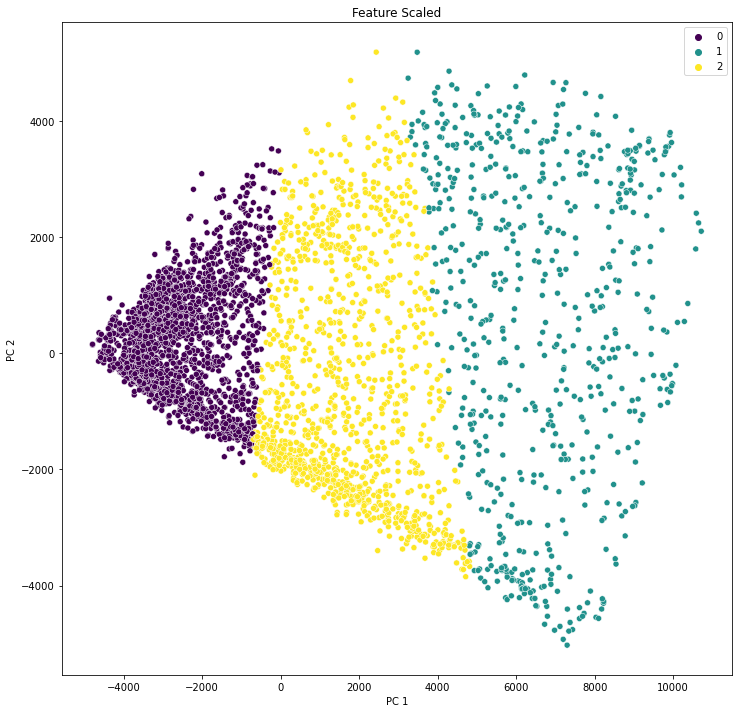

In [50]:
rcParams['figure.figsize'] = 12,12
pca2d=PCA(n_components=2).fit(features)
pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=best_k_means.labels_,palette=sns.color_palette("viridis", as_cmap=True))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Feature Scaled')
# ,palette=sns.color_palette("viridis", as_cmap=True)

segmentasi sudah terlihat sangat baik, dan **sangat sedikit** antar klaster yang tumpang tindih

jadikan label hasil clustering KMeans menjadi **dataframe** 

In [51]:
# concate feature best_k_means.labels_
df_km = pd.DataFrame(best_k_means.labels_, columns=["kmeans_cluster"])

### Evaluasi Spectral Cluster

jika sudah ditemukan algoritma Spectral Cluster dengan parameter yang optimal, maka dilakukan **evaluasi** untuk melihat apakah **antara segmen** atau klaster adayang **tumpang tindih**

Text(0.5, 1.0, 'Feature Scaled')

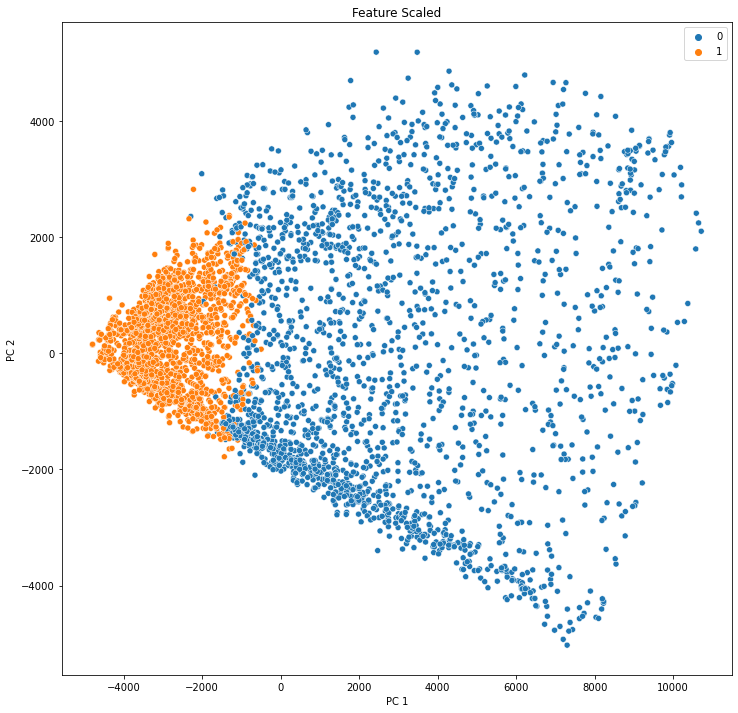

In [52]:
fig,ax=plt.subplots(figsize=(12,12))
pca2d=PCA(n_components=2).fit(features)

pca2d_trans=pca2d.transform(features)
pall = sns.color_palette("Set2")
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=best_sc.labels_) # , palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Feature Scaled')

meskipun sekilas terlihat rapi, akan tetapi ada sebagian kecil **data point saling tupang tindih** antar label. 

jadikan hasil klaster menjadi **dataframe**

In [53]:
df_sc = pd.DataFrame(best_sc.labels_, columns=["spectral_cluster"])

### Evaluasi Gaussian Mixture

jika sudah ditemukan algoritma Gaussian Mixture dengan parameter yang optimal, maka dilakukan **evaluasi** untuk melihat apakah **antara segmen** atau klaster adayang **tumpang tindih**

In [54]:
gmx_result = best_gmx.predict(features_reduced)

<bound method _ColorPalette.as_hex of [(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]>

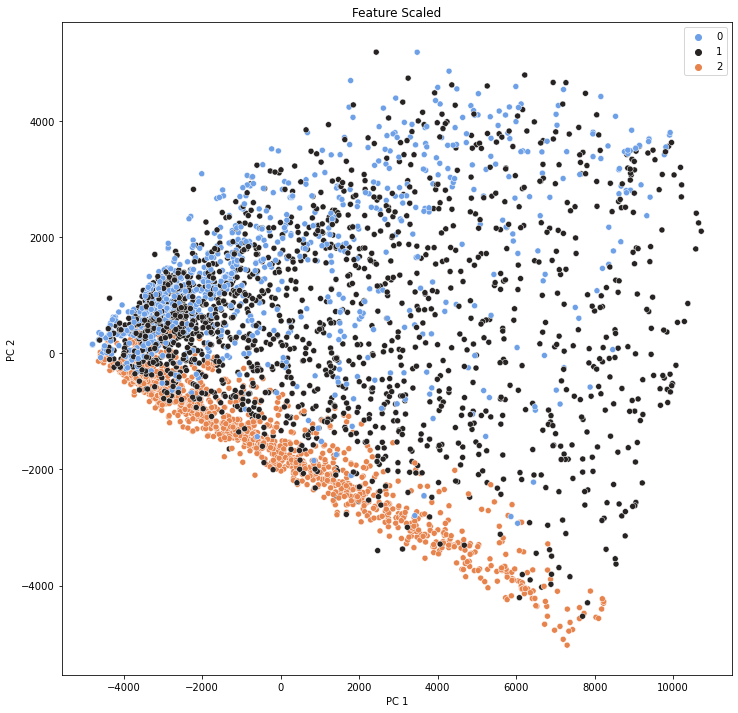

In [55]:
pca2d=PCA(n_components=2).fit(features)

pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=gmx_result,palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Feature Scaled')
pall.as_hex
# palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sepertinya gaussian kurang cocok untuk persebaran data point yang ceperti di kasus ini. dikarenakan sulit mendapatkan hasil label yang tidak saling tumpang tindih

jadikan hasil klaster dari  gaussian mixture menjadi **dataframe**

In [56]:
df_gm = pd.DataFrame(gmx_result, columns=["gaussian_mix"])

## DBSCAN

untuk melihat hasil **DBSCAN** evaluasi menggunakan PCA

<bound method _ColorPalette.as_hex of [(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]>

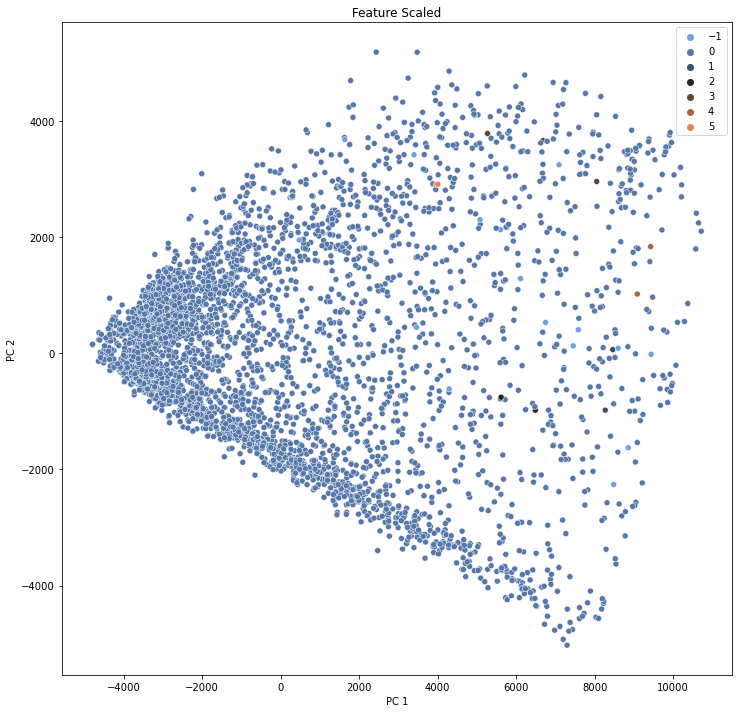

In [57]:

pca2d=PCA(n_components=2).fit(features)

pca2d_trans=pca2d.transform(features)

fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=pca2d_trans[:,0],y=pca2d_trans[:,1],hue=db_best.labels_,palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Feature Scaled')
pall.as_hex

dapat dilihat **DBSCAN** sangat kesulitan untuk membagi segmentasi jika persebaran data secara **scatter plot** seperti gambar diatas.

hasil label **didominasi** oleh **label 0**

## Gabungkan semua hasil segmentasi

dikarenakan hasil selain dari **K means yang paling bagus** dari semua algoritma yang dicoba maka **label dari prediksi K Means saja** yang dipakai untuk Eksplorasi Data Lanjutan

data hasil dari *Clustering* **K Means** akan digabungkan dengan data feature lain dan nantinya akan dilakukan analisa lanjutan

In [58]:
# reset index untuk menghindari error berkelanjutan
features.reset_index(drop=True,inplace=True)

In [59]:
df_final = pd.concat([features,df_km],axis=1)

In [60]:
df_final

,balance,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,kmeans_cluster
0,943.584041,103.00,103.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,215.325023,410.484825,0.000000,0
1,461.455720,585.00,585.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,258.032630,151.696433,0.000000,0
2,1053.594730,1450.00,1450.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1500.0,397.090516,227.143184,0.000000,0
3,2237.238086,120.00,120.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,2500.0,343.102984,712.986387,0.000000,0
4,424.994385,1200.00,1200.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1200.0,57.266292,56.720210,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.545455,9.0,0.0,1200.0,1379.635287,271.364415,0.090909,0
4312,809.582978,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.545455,7.0,0.0,4150.0,4372.148648,241.645387,0.090909,2
4313,3386.490883,560.98,427.22,133.76,2008.153534,1.000000,0.363636,0.545455,9.0,20.0,10100.0,1039.000037,886.050237,0.000000,1
4314,4840.545574,1595.93,1595.93,0.00,4359.325750,0.454545,0.000000,0.545455,15.0,25.0,6000.0,905.844846,2376.919568,0.090909,2


Data yang telah mendapat label ini akan dilakukan **EDA lebih lanjut**

## Pipeline Untuk Model K Means

untuk mempermudah saat melakukan inference

In [61]:
kmeans_pipe = make_pipeline(MinMaxScaler(),PCA(n_components=6),KMeans(n_clusters=3, random_state=42))

In [62]:
kmeans_pipe.fit(features_clean)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=6)),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

# IX. EDA Lanjutan

dalam EDA Lanjutan ini yang dianalisa adalah data yang memiliki **label** hasil dari **clustering menggunakan K Means**

## Hubungan Label Dan Features

### Label terhadap jumlah pinjaman

pinjaman terbbagi menjadi 2 yaitu pinjaman **tunai** dan pinjaman saat **pembelian**.

Dalam pinjaman dalam **pembelian** dibagi menjadi **2 macam** yaitu pembelian **asset** dan pembelian **produk**.

Text(0.5, 1.0, 'Kmeans Label pada oneoff_purchases')

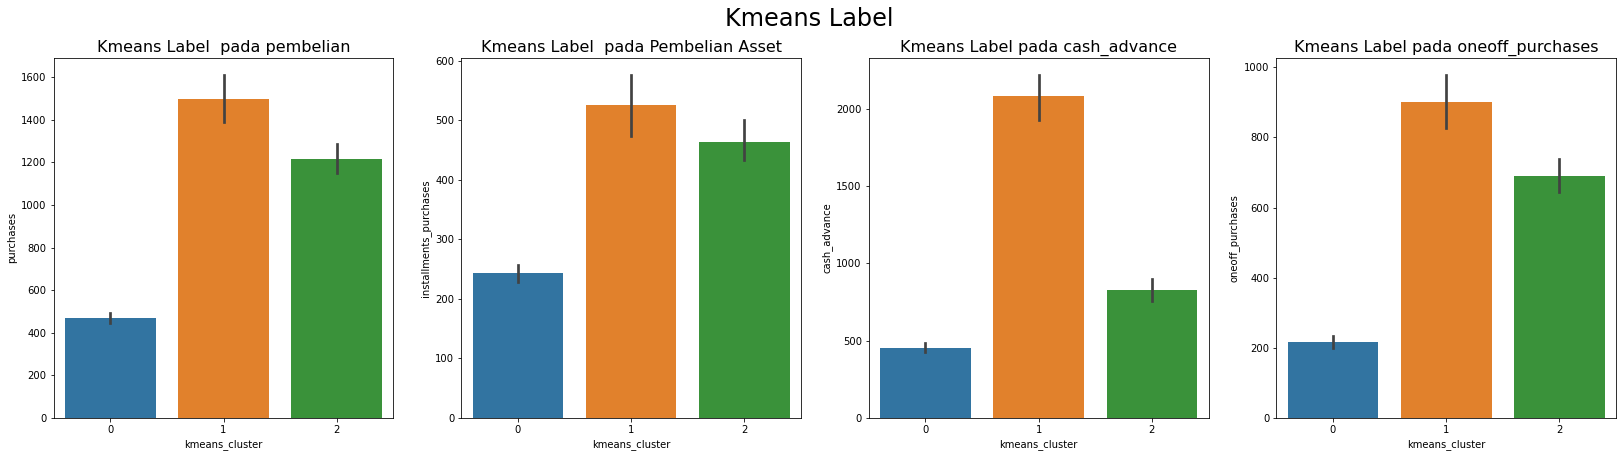

In [63]:
# data group pada tenure dan aggregasi rata-rata
judul = 'Kmeans Label'

fig,ax = plt.subplots(ncols=4,figsize=(28,7))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( data=df_final,x='kmeans_cluster',y='purchases',ax=ax[0])
ax[0].set_title(judul+'  pada pembelian',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='installments_purchases',ax=ax[1])
ax[1].set_title(judul+'  pada Pembelian Asset',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='cash_advance',ax=ax[2])
ax[2].set_title(judul+' pada cash_advance',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='oneoff_purchases',ax=ax[3])
ax[3].set_title(judul+' pada oneoff_purchases',fontsize= 16)

dilihat pada **label 2 dan label 0 terlihat hampir sama** pada Pinjaman Pembelian, kecuali pada pinjaman **Tunai**, pada pinjaman **Tunai label 0 lebih banyak** rata-rata hutangnya, 

sedangkan pada **label 1** terlihat **paling sedikit** rata-rata biaya pinjamannya, namun pada **label 1**, debitur **lebih suka** melakukan **pembelian asset**

### Label Terhadap Jumlah Transaksi

Jumlah Transaksi disini hanya ada dua macam, yaitu **penarikan tunai**, dan **transaksi pembelian**

seberapa sering debitur melakukan transaksi pinjaman jika dilihat dari label.

Text(0.5, 1.0, 'Kmeans Label  pada Penarikan Tunai')

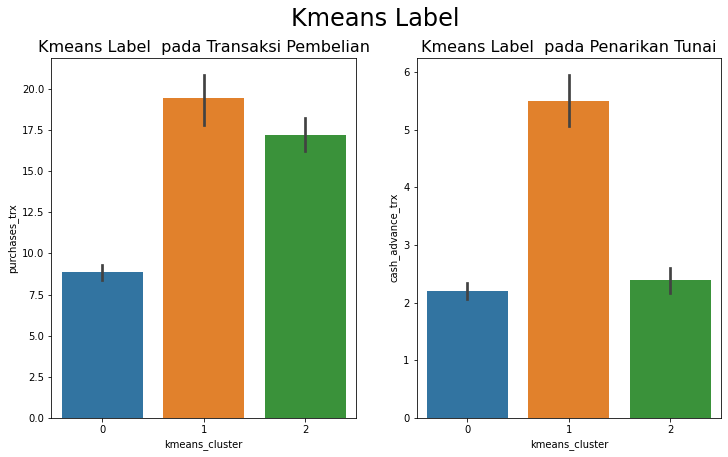

In [64]:
judul = 'Kmeans Label'

fig,ax = plt.subplots(ncols=2,figsize=(12,7))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( data=df_final,x='kmeans_cluster',y='purchases_trx',ax=ax[0])
ax[0].set_title(judul+'  pada Transaksi Pembelian',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='cash_advance_trx',ax=ax[1])
ax[1].set_title(judul+'  pada Penarikan Tunai',fontsize= 16)


untuk **label 0** masih konsisten menjadi yang tertinggi pada **tunai** maupun **pembelian**, namun pada **label 2** transaksi paling sering adalah transaksi pembelian, dan pada **label 1** masih konsisten menjadi yang **paling rendah**

### Label Terhadap Pembayaran Hutang

Melihat Label terhadap bagaimana pola yang bersangkutan dengan pelunasan hutang seperti **rata-rata jumlah pelunasan** , **minimal pelunasan** yang harus dibayar, **credit limit**, **Lunas tiap Bulannya**

Text(0.5, 1.0, 'Kmeans Label pada Lunas/Bulan')

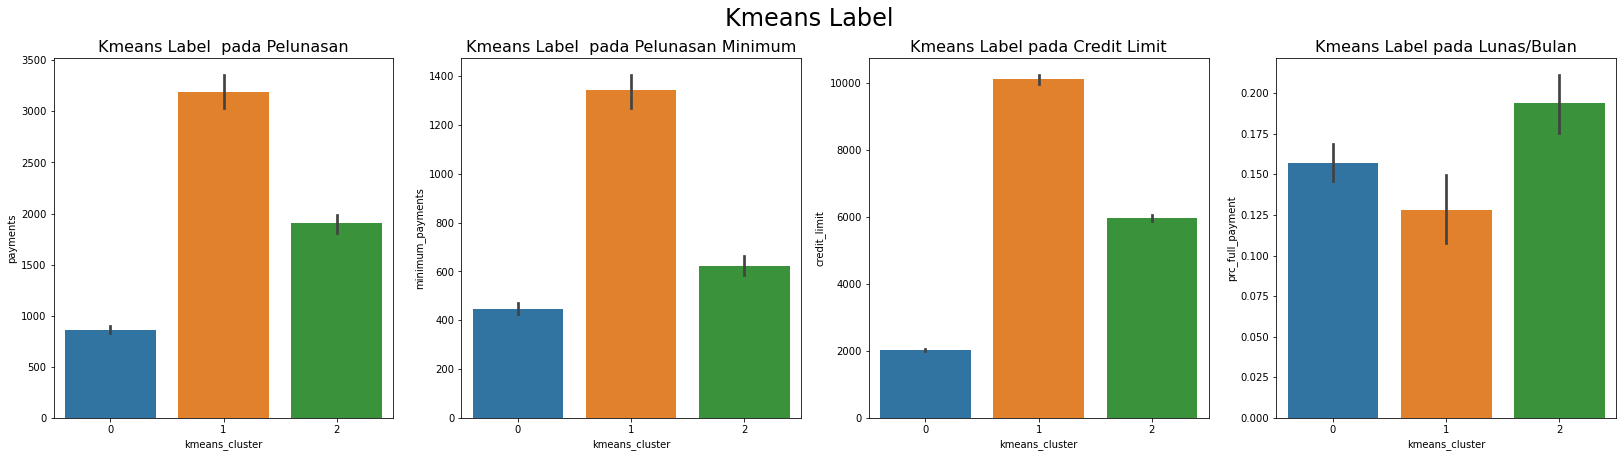

In [65]:
judul = 'Kmeans Label'

fig,ax = plt.subplots(ncols=4,figsize=(28,7))
fig.suptitle(judul,fontsize=24, y=.94)
fig.subplots_adjust(top=.84)
fig.subplots_adjust(hspace=.6)

sns.barplot( data=df_final,x='kmeans_cluster',y='payments',ax=ax[0])
ax[0].set_title(judul+'  pada Pelunasan',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='minimum_payments',ax=ax[1])
ax[1].set_title(judul+'  pada Pelunasan Minimum',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='credit_limit',ax=ax[2])
ax[2].set_title(judul+' pada Credit Limit',fontsize= 16)

sns.barplot(data=df_final,x='kmeans_cluster',y='prc_full_payment',ax=ax[3])
ax[3].set_title(judul+' pada Lunas/Bulan',fontsize= 16)

dalam pelunasan hutang, pada label 0 menjadi terlihat pembayaran lunas per bulannya paling kecil, dan paad label 2 yang paling rajin melunasi hutang tiap bulannya, dan ditengah-tengahnya ada **label 1** dimana status melunasi pinjaman tiap bulan yang **lebih sering** dari label 0 dan **tidak lebih sering** dari label 2

dan pada jumlah pelunasa , minimum pelunasan dan credit limit terlihat sama, dimana label 0 menjadi yang paling tinggi dan label 1 menjadi yang paling rendah, dan label 2 menjadi yang ke-2 tertinggi.

## Penamaan Label

jika dilihat pada EDA lanjutan diputuskan untuk memberi nama pada label hasil dari ***clustering kmeans***, nama label sebagai berikut,

- **Label 0** = `Pinjaman Jangka Panjang` atau nama Servis Pinjaman **Pinjaman Bikin Hati Tenang**<br>
dikarenakan pinjaman **cenderung memiliki pinjaman yang besar** ,transaksi yang paling banyak namun tidak sering **dilunasi setiap bulannya** seperti ada kontrak kompensasi pelunasan lebih lama sebelum jatuh tempo<br>
dari situ terkesan Bank ingin memberi perasaan yang lebih tenang pada Debitur

- **Label 1** = `Pinjaman Jangka Pendek Regular` dengan nama Servis Pinjaman **Pinjaman Paling Simple**<br>
dikarenakan pinjaman yang kecil,credit limit yang kecil, jumlah transaksi yang kecil, dan bisa untuk membeli asset, namun sering dibayar lunas setiap bulannya, secara umum **terlihat lebih simple**.

- **Label 2** = `Pinjaman Jangka Pendek Gold` dengan nama Servis Pinjaman **Pinjaman Gak Bikin Susah**<br>
dikarenakan dapat memberi pinjaman yang lebih besar dengan credit limit yang lebih besar,jumlah transaksi yang hampir sama seperti jangka panjang, dan **pinjaman cenderung dapat dibayar lunas tiap bulannya** <br>
secara umum terlihat seperti pinjaman untuk **orang sangat mampu** dan **tidak mau dibatasi** dengan credit limit, **terkesan tidak bikin susah**

<caption>p.s. nama servis pinjaman hanya untuk peraga saya </caption>

## Masukan Nama Label Pada Dataframe

penamaan label akan menggunakan akronim dimana,
- **Pinjaman Bikin Hati Tenang** = **PBHT**
- **Pinjaman Paling Simple** = **PPS**
- **Pinjaman Gak Bikin Susah** = **PGBS**

In [66]:
# konvert dari label menuju nama servis pinjaman
def label_product(label):
    if label['kmeans_cluster'] == 0:
        return 'PBHT'
    elif label['kmeans_cluster']  == 1:
        return 'PPS'
    elif label['kmeans_cluster']  == 2:
        return 'PGBS'
    else:
        return 'unknown'

Tambah Kolom `credit_service` untuk menampung naman servis pinjaman

In [67]:
df_final['credit_service'] = df_final.apply(label_product,axis=1)

In [68]:
df_final

,balance,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,kmeans_cluster,credit_service
0,943.584041,103.00,103.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,215.325023,410.484825,0.000000,0,PBHT
1,461.455720,585.00,585.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,258.032630,151.696433,0.000000,0,PBHT
2,1053.594730,1450.00,1450.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1500.0,397.090516,227.143184,0.000000,0,PBHT
3,2237.238086,120.00,120.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,2500.0,343.102984,712.986387,0.000000,0,PBHT
4,424.994385,1200.00,1200.00,0.00,0.000000,0.125000,0.000000,0.000000,0.0,1.0,1200.0,57.266292,56.720210,0.000000,0,PBHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.545455,9.0,0.0,1200.0,1379.635287,271.364415,0.090909,0,PBHT
4312,809.582978,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.545455,7.0,0.0,4150.0,4372.148648,241.645387,0.090909,2,PGBS
4313,3386.490883,560.98,427.22,133.76,2008.153534,1.000000,0.363636,0.545455,9.0,20.0,10100.0,1039.000037,886.050237,0.000000,1,PPS
4314,4840.545574,1595.93,1595.93,0.00,4359.325750,0.454545,0.000000,0.545455,15.0,25.0,6000.0,905.844846,2376.919568,0.090909,2,PGBS


label terlihat sudah tepat pada sisi paling kanan data frame

# X. Model Inference

In [69]:
pickup_inf.reset_index(drop=True,inplace=True)

## Data Preprocessing

data preprocessing is cloned from the data training and test preprocessing

### Missing Value

cek informasi data inference

In [70]:
pickup_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           12 non-null     int64  
 1   balance                           12 non-null     float64
 2   balance_frequency                 12 non-null     float64
 3   purchases                         12 non-null     float64
 4   oneoff_purchases                  12 non-null     float64
 5   installments_purchases            12 non-null     float64
 6   cash_advance                      12 non-null     float64
 7   purchases_frequency               12 non-null     float64
 8   oneoff_purchases_frequency        12 non-null     float64
 9   purchases_installments_frequency  12 non-null     float64
 10  cash_advance_frequency            12 non-null     float64
 11  cash_advance_trx                  12 non-null     int64  
 12  purchases_

data inference tidak memiliki missing value

### Pilih Feature

pada pemilihan feature inference, harus sama dengan feature data Training

In [71]:
selected_inf = pickup_inf.drop(drop_list,axis=1)

In [72]:
selected_inf

,balance,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment
0,1441.679257,0.00,0.00,0.00,914.794214,0.000000,0.000000,0.083333,1,0,6500.0,568.212802,308.891830,0.000000
1,1747.858092,3048.40,2500.80,547.60,119.336811,0.750000,0.333333,0.083333,1,30,3000.0,1390.388571,403.495870,0.000000
2,883.835888,187.47,0.00,187.47,0.000000,0.750000,0.666667,0.000000,0,9,1000.0,263.631752,434.734741,0.000000
3,834.789126,0.00,0.00,0.00,207.027078,0.000000,0.000000,0.090909,2,0,13500.0,717.257211,233.199801,0.000000
4,5.116471,50.20,50.20,0.00,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,200.963332,109.182077,0.333333
5,130.890211,131.26,0.00,131.26,0.000000,0.333333,0.333333,0.000000,0,4,3000.0,763.568532,67.294065,0.090909
6,2517.382470,320.00,320.00,0.00,2357.815693,0.166667,0.000000,0.500000,5,2,2500.0,552.896593,978.223000,0.000000
7,17.092052,1160.00,0.00,1160.00,0.000000,1.000000,1.000000,0.000000,0,29,7000.0,1587.607855,78.175369,0.400000
8,933.072519,12.40,12.40,0.00,1085.487045,0.083333,0.000000,0.166667,6,1,2500.0,481.589626,238.636185,0.083333
9,1695.404810,1641.48,1377.06,264.42,1105.875503,0.916667,0.416667,0.583333,9,26,7000.0,3423.435143,629.237655,0.000000


## Clustering Data Inference

Menggunakan model **KMeans** yang telah dibuat dan di fit

In [73]:
inf_label_kmeans = kmeans_pipe.predict(selected_inf)

#### Hasil Clustering

hasil clustering dijadikan dataframe

In [74]:
df_label_inf = pd.DataFrame(inf_label_kmeans,columns=['kmeans_cluster'])
df_label_inf

,kmeans_cluster
0,2
1,1
2,2
3,2
4,2
5,2
6,0
7,1
8,2
9,1


gabungkan hasil clustering dan berikan nama product

In [75]:
# concate between inference and clustering result

df_final_inf = pd.concat([pickup_inf,df_label_inf],axis=1)

df_final_inf['credit_service'] = df_final_inf.apply(label_product,axis=1)

In [76]:
df_final_inf

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,kmeans_cluster,credit_service
0,2828,1441.679257,1.000000,0.00,0.00,0.00,914.794214,0.000000,0.000000,0.000000,0.083333,1,0,6500.0,568.212802,308.891830,0.000000,12,2,PGBS
1,8504,1747.858092,1.000000,3048.40,2500.80,547.60,119.336811,0.750000,0.666667,0.333333,0.083333,1,30,3000.0,1390.388571,403.495870,0.000000,12,1,PPS
2,5672,883.835888,1.000000,187.47,0.00,187.47,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,1000.0,263.631752,434.734741,0.000000,12,2,PGBS
3,8360,834.789126,1.000000,0.00,0.00,0.00,207.027078,0.000000,0.000000,0.000000,0.090909,2,0,13500.0,717.257211,233.199801,0.000000,11,2,PGBS
4,4710,5.116471,0.363636,50.20,50.20,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,1000.0,200.963332,109.182077,0.333333,12,2,PGBS
5,366,130.890211,0.363636,131.26,0.00,131.26,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,3000.0,763.568532,67.294065,0.090909,12,2,PGBS
6,2352,2517.382470,1.000000,320.00,320.00,0.00,2357.815693,0.166667,0.166667,0.000000,0.500000,5,2,2500.0,552.896593,978.223000,0.000000,6,0,PBHT
7,2690,17.092052,0.454545,1160.00,0.00,1160.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,29,7000.0,1587.607855,78.175369,0.400000,12,1,PPS
8,8668,933.072519,1.000000,12.40,12.40,0.00,1085.487045,0.083333,0.083333,0.000000,0.166667,6,1,2500.0,481.589626,238.636185,0.083333,12,2,PGBS
9,6558,1695.404810,1.000000,1641.48,1377.06,264.42,1105.875503,0.916667,0.750000,0.416667,0.583333,9,26,7000.0,3423.435143,629.237655,0.000000,12,1,PPS


# XI. Kesimpulan

Akhirnya sampai pada bagian kesimpulan dimana harus diingatkan lagi pada **objective** Graded Challenge 4 kali ini adalah **membuat Clustering** pada data Servis Pinjaman/Ciciian menggunakan **KMeans** dan 2 algoritma lain.

Kembali **Pada Hasil EDA** untuk mengenal lebih dekat tentang data yang akan diolah, dimana didalamnya diketahui bahwa **kebanyakan Debitur** menggunakan servis **cicilan 12 bulan** untuk segala pembelian,
kecuali pada pinjaman tunai. Pada Pinjaman tunai Debitur lebih suka meminjam dengan batasan waktu yang lebih singkat dari 12 bulan.dan **pinjaman yang paling rajin dibayar lunas** adalah pinjaman jangka waktu **9 bulan** dan pinjaman jangka waktu **6 bulan**. Dan Semakin kecil balance credit, maka debitur semakin rajin melunasi hutang.

ada beberapa fitur yang tidak digunakan karena fitur tersebut dapat tergolong kategori atau variasi nilai nya sangat kecil. kolom feature nya antara lain `'cust_id', 'balance_frequency', 'oneoff_purchases_frequency', 'tenure'`

sebelum memodelkan algoritma, dilakukan **pengurangan dimensi** feature dengan **PCA** dengan 6 komponen dan mempertahankan **kumulatif EVR hingga 80%**.

setelah Dilakukan PCA maka langkah selanjutnya adalah pemodelan Machine learning, dengan menggunakan pendekatan Unsupervised Machine Learning dengan algoritma **KMeans** , **Spectral Clustering** , dan **Gaussian Mixture**, dilakukan juga **DBSCAN** untuk memastikan bahwa persebaran data point pada kasus ini tidak cocok dilakukan dengan algoritma **DBSCAN**.

Setelah Dilakukan **Evaluasi Model** Dengan Pemisahan antar segmen **sangat terlihat bagus pada model Kmeans** antar segmen terlihat jelas dan tidak saling tumpang tindih, sedangkan pada **model lain terdapat data point yang masih tumpang tindih** antar segmen klaster.

hasil evaluasi dari hasil clustering dapat disimpulkan bahwa **KMeans dengan banyak segmen 3 klaster** adalah algoritma yang terbaik dan dapat diimplementasikan ke data inference. akan tetapi sebelum melakukan Inference harus dilakukan **eksplorasi lanjutan** ata EDA Lanjutan untuk mengenal lebih baik hasil dari label yang dihasilkan oleh Kmeans clustering tersebut.

Pada EDA lanjutan telah ditemukan bahwa pada **Label 0** secara Banyak Transaksi, Besar Pinjaman dan tagihan adalah yang **paling besar** rata-ratanya, tetapi jarang terjadi pelunasan tiap bulannya. dan pada **label 1** terdapat Banyak Transaksi, Besar Pinjaman dan tagihan adalah yang **paling Kecil** rata-ratanya, namun pelunasannya setiap bulan termasuk tinggi. dan pada **label 2** mereka terli seperti **urutan ke-2** dari segi transaksi,besar pinjaman dan jumlah tagihan, namun **sering dibayar lunas tiap bulannya**.

Dari EDA lanjutan tersebut maka diputuskan penamaan label tersebut dengan jenis **pelayanan pinjaman** yang terbagi dari 3 kategori yaitu **Pinjaman Bikin Hati Tenang** pada label 0 di singkat **PBHT**, **Pinjaman Paling Simple** pada label 1 disingkat **PPS**, dan **Pinjaman Gak Bikin Susah** pada label 2 atau disingkat **PGBS**. singkatan tersebut yang nanti disimpan pada dataframe maupun database.


# Pertanyaan Konseptual 

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
    - Inertia merupakan **jarak** setiap data point pada **centroid** pada 1 klaster,dan setiap jarak dikuadratkan lalu dijumlahkan. nilai ***Inertia*** dapat digunakan untuk melihat seberapa bagus model clustering.
2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
    - elbow method digunakan untuk menentukan banyak klaster dengan melihat tabel garis ***inertia***, dari tabel tersebut harus dilihat sebuah patahan atau dengan melihat turunnya inertia berkolerasi dengan banyaknya klaster sudah tidak signifikan lagi.
    - yang menjadi masalah dengan elbow method adalah 
        - jika tidak terjadi patahan dan sulitnya menilai turunnya inertia terhadap banyak klaster signifikan atau tidak.
        - terkadang harus mencoba beberapa jumlah klaster jika ada beberapa patahan terlihat pada tabel garis inertia dengan melihat visual hasil dengan scatter plot .
    - kelebihannya mudah diterapkan.
3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !
    - **Kmeans** menggunakan jarak data point dan centroid klaster untuk membuat keputusan klastering, dan biasanya tidak cocok dengan variasi datapoint yang sangat berbeda.
    - **Gaussian Mix** Melibatkan Perhitungan peluang *LikelyHood* dan melihat mana yang nilai peluangnya lebih besar antar garis tengah dari sebuah klaster, klaster dibentuk dengan melibatkan banyak distribusi normal dari setiap feature. sangat cocok jika variasi persebaran data point berbeda beda setiap kolmpoknya.
    - **spectral clustering** adalah algoritma clustering yang melibatkan dekomposisi eigen value dan eigen vektor, dan dari eigen vektor Feature, masukan berapa banyak segmentasi untuk klastering.